<a href="https://colab.research.google.com/github/shambhavi1708/disease-detection-system/blob/main/Cardiovascular_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
df = pd.read_csv(r'/content/heart_disease_data.csv')

In [ ]:
# View Dataset before Cleaning
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Check for Missing Values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Handling Missing Values
df.fillna(df.median(), inplace=True)

In [ ]:
# View Dataset After Cleaning
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
x = df.drop(['target'], axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(x_train, y_train)

svm_model = SVC(kernel='linear', probability=True, random_state=0)
svm_model.fit(x_train, y_train)

log_reg_model = LogisticRegression(max_iter=1000, random_state=0)
log_reg_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
rf_pred = rf_model.predict(x_test)
svm_pred = svm_model.predict(x_test)
log_reg_pred = log_reg_model.predict(x_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred) * 100
svm_accuracy = accuracy_score(y_test, svm_pred) * 100
log_reg_accuracy = accuracy_score(y_test, log_reg_pred) * 100

In [ ]:
models = {
    "Random Forest": rf_model,
    "SVM": svm_model,
    "Logistic Regression": log_reg_model
}

metrics = {}
for name, model in models.items():
    y_pred = model.predict(x_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics[name] = {"Precision": precision, "Recall": recall, "F1-score": f1}

print("\n🔹 Cardiovascular Disease Model Performance:")
print(f"{'Model':<20}{'Accuracy':<12}{'Precision':<12}{'Recall':<12}{'F1-score':<12}")

for model_name, values in metrics.items():
    acc = accuracy_score(y_test, models[model_name].predict(x_test)) * 100
    print(f"{model_name:<20}{acc:<12.2f}{values['Precision']:<12.2f}{values['Recall']:<12.2f}{values['F1-score']:<12.2f}")


🔹 Cardiovascular Disease Model Performance:
Model               Accuracy    Precision   Recall      F1-score    
Random Forest       86.89       0.91        0.85        0.88        
SVM                 81.97       0.81        0.88        0.85        
Logistic Regression 85.25       0.84        0.91        0.87        


<ipython-input-72-05bf4e4fe340>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models_list, y=accuracy_scores, palette='viridis')


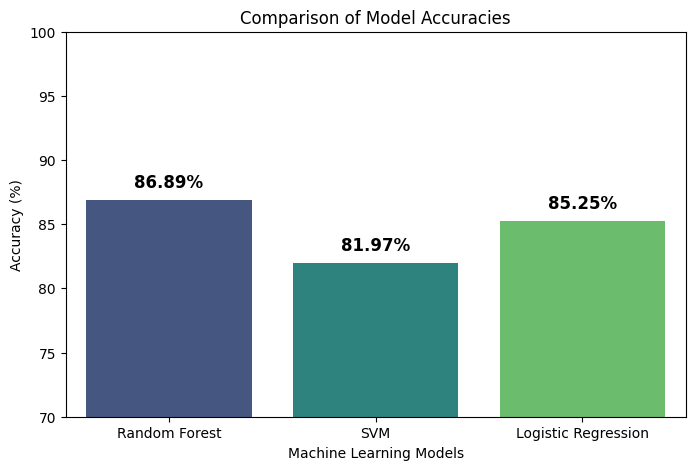

In [ ]:
plt.figure(figsize=(8, 5))
models_list = list(models.keys())
accuracy_scores = [rf_accuracy, svm_accuracy, log_reg_accuracy]
sns.barplot(x=models_list, y=accuracy_scores, palette='viridis')
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracies")
plt.ylim(70, 100)

for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12, fontweight='bold')
plt.show()

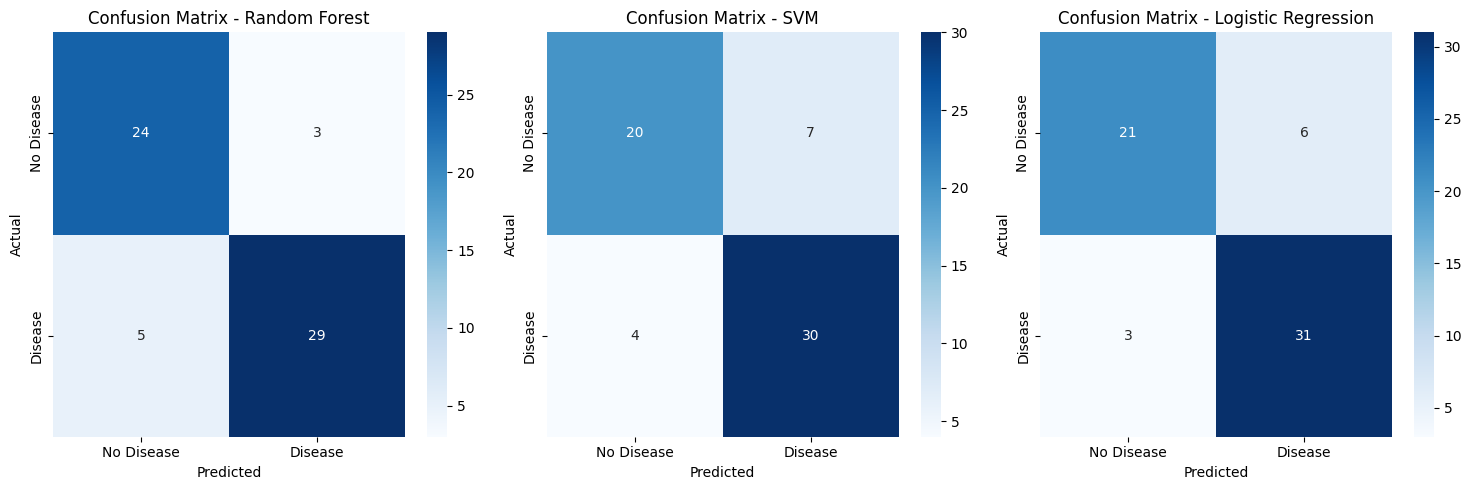

In [ ]:
# Confusion Matrices
plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(x_test))
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Disease", "Disease"],
                yticklabels=["No Disease", "Disease"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.show()

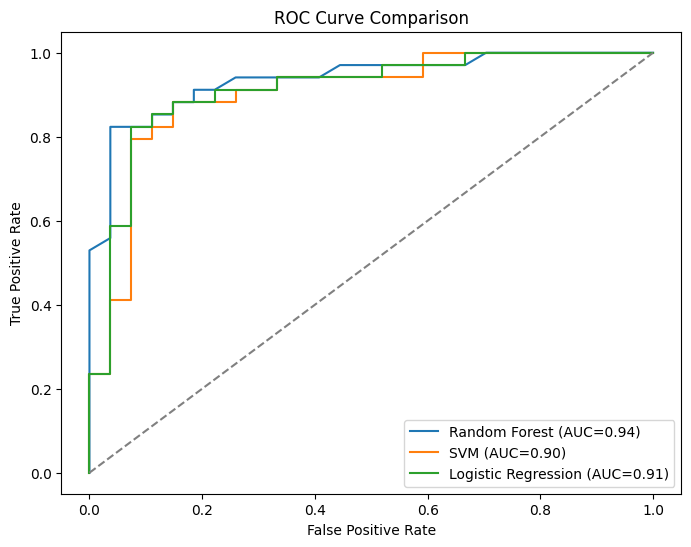

In [ ]:
# ROC Curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()